<a href="https://colab.research.google.com/github/Mubarok982/DM_ML/blob/main/backpropagtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import os

In [2]:
# Nama file Excel
file_name = 'Data_curah_hujan.xlsx'

if not os.path.isfile(file_name):
    raise FileNotFoundError(f'File {file_name} tidak ditemukan di direktori kerja.')

In [3]:
# Muat dataset "data_latih" dan "data_uji"
latih_data = pd.read_excel(file_name, sheet_name='data_latih')
uji_data = pd.read_excel(file_name, sheet_name='data_uji')

print('Data Latih:')
print(latih_data.head())

print('Data Uji:')
print(uji_data.head())

Data Latih:
   pola        x1        x2        x3        x4        x5        x6        x7  \
0     1  0.772124  0.734131  0.433591  0.350193  0.200695  0.164865  0.261544   
1     2  0.734131  0.433591  0.350193  0.200695  0.164865  0.261544  0.172587   
2     3  0.433591  0.350193  0.200695  0.164865  0.261544  0.172587  0.138301   
3     4  0.350193  0.200695  0.164865  0.261544  0.172587  0.138301  0.416911   
4     5  0.200695  0.164865  0.261544  0.172587  0.138301  0.416911  0.268649   

         x8        x9       x10       x11       x12    Target  
0  0.172587  0.138301  0.416911  0.268649  0.570734  0.833591  
1  0.138301  0.416911  0.268649  0.570734  0.833591  0.761004  
2  0.416911  0.268649  0.570734  0.833591  0.761004  0.452124  
3  0.268649  0.570734  0.833591  0.761004  0.452124  0.442857  
4  0.570734  0.833591  0.761004  0.452124  0.442857  0.211197  
Data Uji:
   pola        x1        x2        x3        x4        x5        x6        x7  \
0     1  0.900000  0.79806

In [4]:
# Konversi tabel menjadi numpy array
latih_matrix = latih_data.to_numpy()
uji_matrix = uji_data.to_numpy()

print(f'Data Latih: {latih_matrix.shape[0]} baris dan {latih_matrix.shape[1]} kolom.')
print(f'Data Uji: {uji_matrix.shape[0]} baris dan {uji_matrix.shape[1]} kolom.')

Data Latih: 12 baris dan 14 kolom.
Data Uji: 12 baris dan 14 kolom.


In [5]:
# Pisahkan input dan target
train_inputs = latih_matrix[:, :12]
train_targets = latih_matrix[:, -1]
test_inputs = uji_matrix[:, :12]
test_targets = uji_matrix[:, -1]

In [6]:
# Buat model jaringan saraf tiruan
model = Sequential()
model.add(Dense(10, input_dim=12, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Kompilasi model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

In [8]:
# Latih model
history = model.fit(train_inputs, train_targets, epochs=1000, verbose=0)

# Prediksi data uji
predictions = model.predict(test_inputs).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [9]:
# Evaluasi performa
mse_error = mean_squared_error(test_targets, predictions)
print(f'Mean Squared Error (MSE) pada data uji: {mse_error:.4f}')

# Perbandingan Target vs Prediksi
print(pd.DataFrame({'Actual': test_targets, 'Predicted': predictions}))

Mean Squared Error (MSE) pada data uji: 0.0195
      Actual  Predicted
0   0.772124   0.872188
1   0.734131   0.744724
2   0.433591   0.613231
3   0.350193   0.440421
4   0.200695   0.325819
5   0.164865   0.283228
6   0.261544   0.243358
7   0.172587   0.171856
8   0.138301   0.151295
9   0.416911   0.165633
10  0.268649   0.224412
11  0.570734   0.274204


# visualisasi

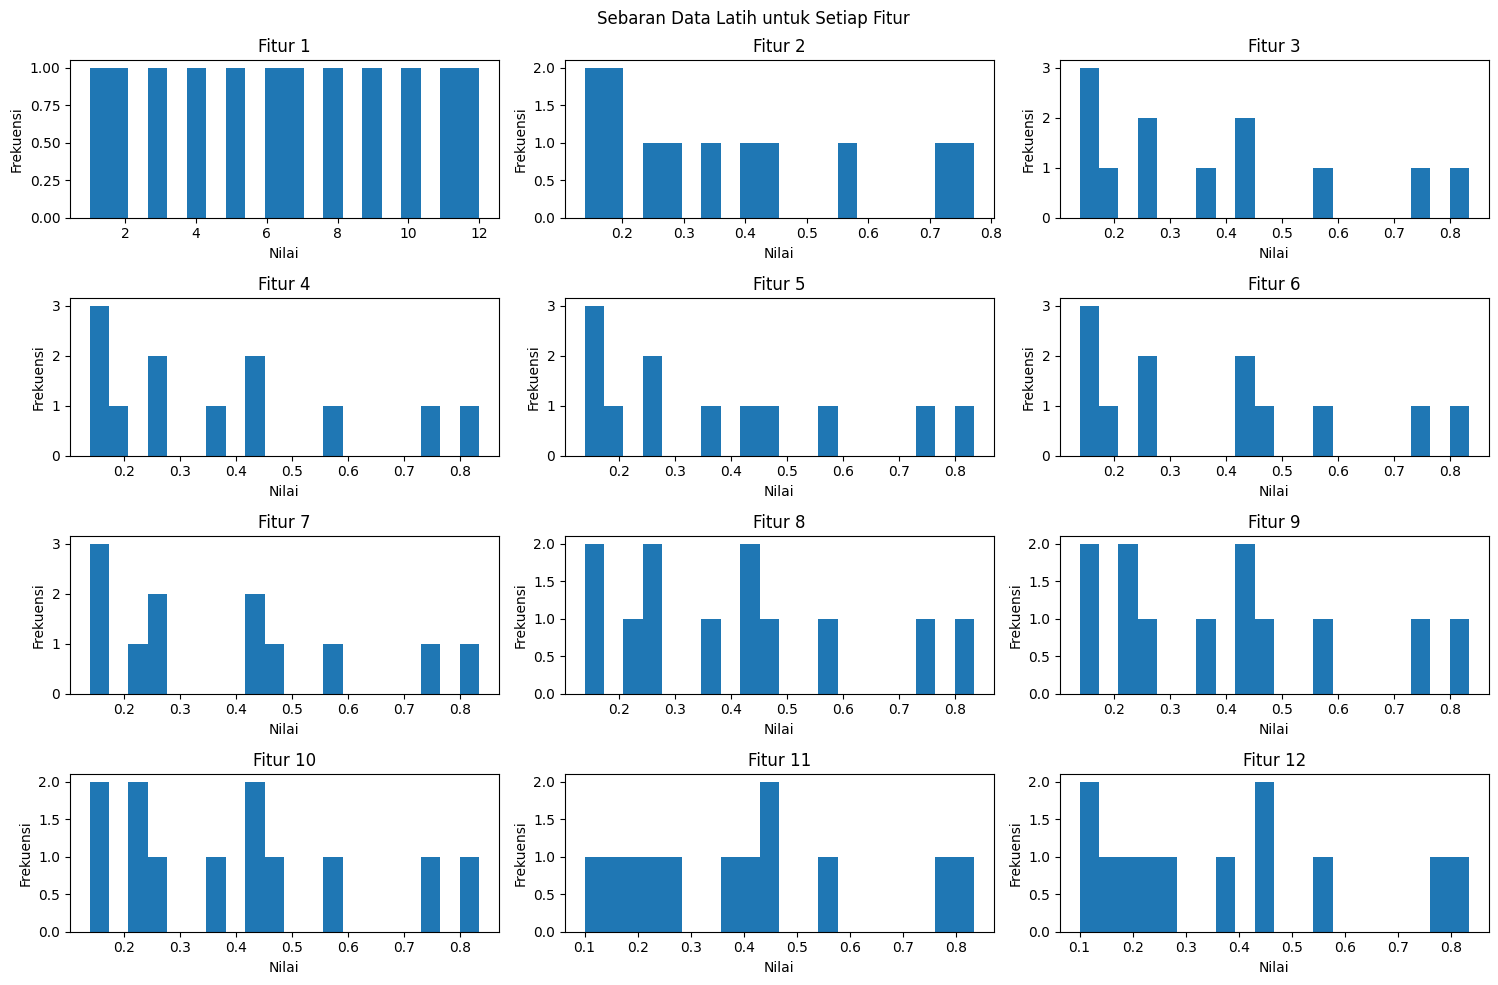

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


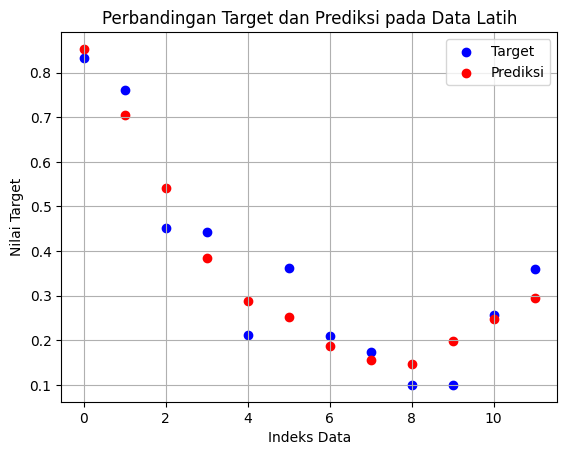

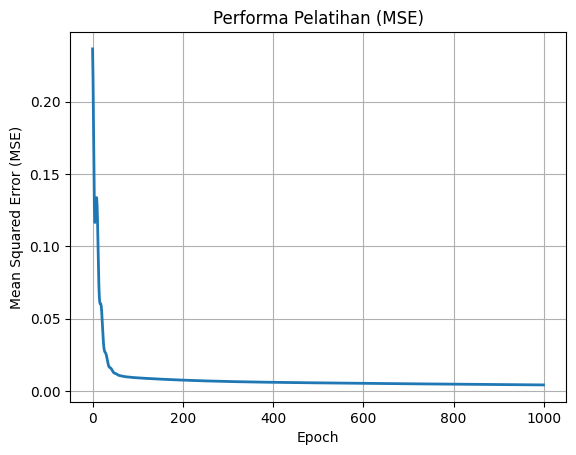

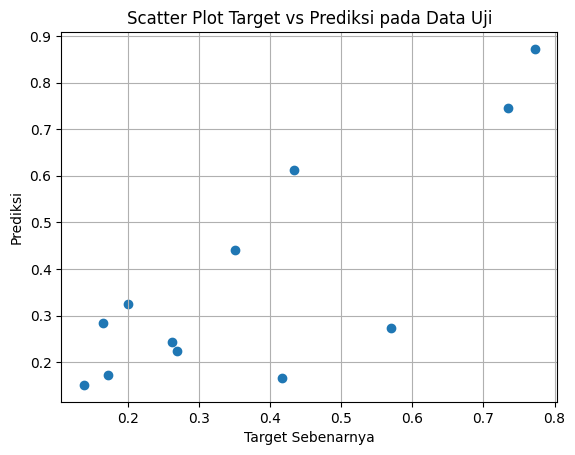

Tingkat keakuratan hasil prediksi: 72.17%

Bobot Input ke Hidden Layer:
[[ 0.10079605 -0.30079204  0.08904337  0.1289373  -0.20573345 -0.41064587
  -0.3819055  -0.29025415 -0.0691763  -0.0956644 ]
 [-0.38395467 -0.0068029   0.12821104  0.2271741   0.27587098 -0.24148974
   0.14872052 -0.18321496 -0.0950859  -0.2688891 ]
 [-0.09555164  0.4078495   0.23015615  0.4485755  -0.4383908   0.16597427
  -0.1326401  -0.20552969 -0.3298977  -0.0905292 ]
 [-0.4149866   0.36177105  0.48010507 -0.3315902  -0.3287033   0.26722506
   0.4182933   0.0945958   0.253385   -0.46772775]
 [ 0.18705991  0.17171702 -0.11816373 -0.26059788 -0.07285576 -0.28320095
  -0.24381341  0.48917902 -0.13730799  0.18927512]
 [-0.02780833  0.18366155 -0.12825122 -0.14678548  0.24309088 -0.15060303
  -0.07982254 -0.2638076   0.46567678  0.14291358]
 [ 0.27840278 -0.43933043 -0.285902    0.12889636 -0.2722343   0.35453317
   0.31555825 -0.22618328  0.5487938   0.5228085 ]
 [-0.44080117 -0.19512941 -0.43986243 -0.061063    0.

In [10]:
# 1. Histogram sebaran fitur
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.hist(train_inputs[:, i], bins=20)
    plt.title(f'Fitur {i+1}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
plt.suptitle('Sebaran Data Latih untuk Setiap Fitur')
plt.tight_layout()
plt.show()

# 2. Scatter plot prediksi vs target (latih)
train_predictions = model.predict(train_inputs).flatten()
plt.figure()
plt.scatter(range(len(train_targets)), train_targets, label='Target', color='blue')
plt.scatter(range(len(train_targets)), train_predictions, label='Prediksi', color='red')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Target')
plt.legend()
plt.title('Perbandingan Target dan Prediksi pada Data Latih')
plt.grid(True)
plt.show()

# 3. Plot MSE selama pelatihan
plt.figure()
plt.plot(history.history['loss'], linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performa Pelatihan (MSE)')
plt.grid(True)
plt.show()

# 4. Scatter Plot Data Uji
plt.figure()
plt.scatter(test_targets, predictions)
plt.xlabel('Target Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Scatter Plot Target vs Prediksi pada Data Uji')
plt.grid(True)
plt.show()

# Akurasi
absolute_error = np.abs(test_targets - predictions)
mean_absolute_error_val = np.mean(absolute_error)
accuracy = 100 * (1 - mean_absolute_error_val / np.mean(test_targets))
print(f'Tingkat keakuratan hasil prediksi: {accuracy:.2f}%')

# Bobot dan Bias
weights_input_to_hidden = model.layers[0].get_weights()[0]
bias_hidden = model.layers[0].get_weights()[1]
weights_hidden_to_output = model.layers[1].get_weights()[0]
bias_output = model.layers[1].get_weights()[1]

print("\nBobot Input ke Hidden Layer:")
print(weights_input_to_hidden)
print("Bias Hidden Layer:")
print(bias_hidden)
print("Bobot Hidden ke Output Layer:")
print(weights_hidden_to_output)
print("Bias Output Layer:")
print(bias_output)
